In [1]:
import sys
import time
import math
sys.path.insert(0, r'/home/danis/work/python_works/gamma_4/Scripts')
sys.path.insert(0, r'D:\Учеба\Практика\Диплом\gamma_4\Scripts')
import numpy as np
import pandas as pd
from materials import*
import matplotlib.pyplot as plt

Минимальная энергия: 1e-3
windows (w) or linux (l): w


Параметры пучков и спектры

In [6]:
linspace1 = np.linspace(0.035, 0.1, 25, dtype=np.float32)
linspace2 = np.geomspace(0.11, 3, 25, dtype=np.float32)

beams_energyes = []
beams_energyes.extend(linspace1)
beams_energyes.extend(linspace2)

In [7]:
m = 40
target = R(Material(m), 0.01)

brems = [target.brem(beams_energy) for beams_energy in beams_energyes]
brems_e = [brem * en for brem in brems]

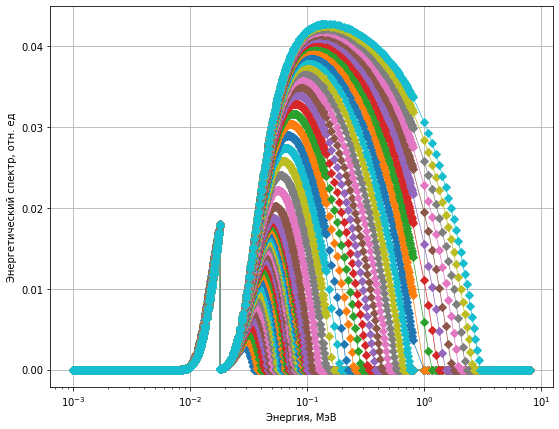

In [8]:
fig, ax = plt.subplots(figsize=(9, 7))

for br in brems_e:
    ax.plot(en, br, ls='-', marker='D', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

Номер первого канала и К-скачки

In [9]:
n = 11

In [10]:
# Индексы К скачков
EDGE = []
for i in range(1, len(en)):
    if en[i - 1] == en[i]:
        EDGE.append(i - 1)

In [11]:
EDGE.remove(EDGE[EDGE.index(Material(m).k_index())])

Уровни пропускания в К-крае

In [12]:
linspace3 = np.linspace(0.001, 0.9, 51)
for i, val in enumerate(linspace3):
    linspace3[i] = round(val, 5)
    
levels = []
levels.extend(linspace3)

Спектральные характеристики чувствительности каналов

In [13]:
def ross_by_k_level(num_1, num_2, level):
    t_2 = Material(num_2).lt(level)
    f_2 = R(Material(num_2), Material(num_2).lt(level)).f()
    t_1 = Material(num_1).lt(R(Material(num_2), Material(num_2).lt(level)).f()[Material(num_1).k_index()])
    f_1 = R(Material(num_1), t_1).f()
    return f_2 - f_1

In [14]:
resp_ross = []

start_time = time.time()
for ind, j in enumerate(levels):
    print(f'({ind}), время: {round(time.time() - start_time, 5)}, секунд')
    resp = []
    for i in range(n, 100):
        resp.append(ross_by_k_level(i, i+1, j))
    resp_ross.append(resp)

(0), время: 0.0, секунд
(1), время: 2.06034, секунд
(2), время: 3.97419, секунд
(3), время: 5.91781, секунд
(4), время: 7.84494, секунд
(5), время: 9.84999, секунд
(6), время: 11.85422, секунд
(7), время: 13.76551, секунд
(8), время: 15.70765, секунд
(9), время: 17.96117, секунд
(10), время: 20.15611, секунд
(11), время: 22.41206, секунд
(12), время: 24.68662, секунд
(13), время: 26.95459, секунд
(14), время: 29.15395, секунд
(15), время: 31.6449, секунд
(16), время: 34.1241, секунд
(17), время: 36.62423, секунд
(18), время: 39.09534, секунд
(19), время: 41.47062, секунд
(20), время: 43.91054, секунд
(21), время: 46.32593, секунд
(22), время: 48.71746, секунд
(23), время: 51.10605, секунд
(24), время: 53.72598, секунд
(25), время: 56.15001, секунд
(26), время: 58.64784, секунд
(27), время: 61.11071, секунд
(28), время: 63.72814, секунд
(29), время: 66.26319, секунд
(30), время: 68.70779, секунд
(31), время: 71.20186, секунд
(32), время: 74.01325, секунд
(33), время: 77.01352, секунд
(3

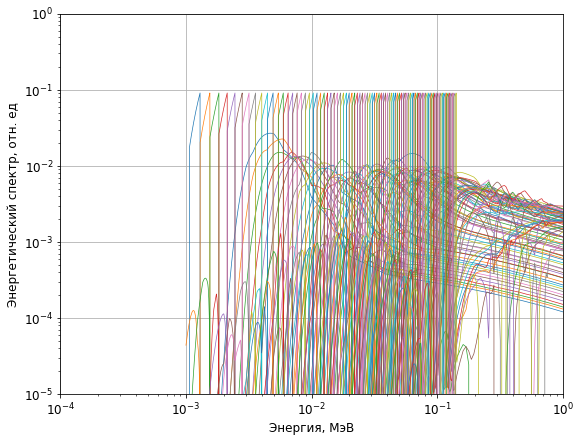

In [15]:
fig, ax = plt.subplots(figsize=(9, 7))

for i in resp_ross[5]:
    ax.plot(en, i, ls='-', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-4, 1e0)
ax.set_ylim(1e-5, 1e0)
ax.grid(True)

Матрицы задач

In [16]:
from garipov_deconvolution import get_coeff_simpson

In [17]:
Matrixs = []

start_time = time.time()

for i in range(len(resp_ross)):
    print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
    matrix = []
    
    for response in resp_ross[i]:
        matrix.append(get_coeff_simpson(response, en, EDGE)[0])
    
    Matrixs.append(matrix)

(0), время: 0.0 секунд
(1), время: 3.23894 секунд
(2), время: 6.61952 секунд
(3), время: 9.72189 секунд
(4), время: 12.89796 секунд
(5), время: 16.14423 секунд
(6), время: 19.32956 секунд
(7), время: 22.57396 секунд
(8), время: 25.79394 секунд
(9), время: 29.07865 секунд
(10), время: 32.41902 секунд
(11), время: 35.58308 секунд
(12), время: 38.78779 секунд
(13), время: 41.90027 секунд
(14), время: 45.09491 секунд
(15), время: 48.45578 секунд
(16), время: 51.89905 секунд
(17), время: 55.10031 секунд
(18), время: 58.28541 секунд
(19), время: 61.41679 секунд
(20), время: 64.50963 секунд
(21), время: 67.56433 секунд
(22), время: 70.78096 секунд
(23), время: 73.99581 секунд
(24), время: 77.25826 секунд
(25), время: 80.38913 секунд
(26), время: 83.64156 секунд
(27), время: 86.74682 секунд
(28), время: 89.97534 секунд
(29), время: 93.09777 секунд
(30), время: 96.2747 секунд
(31), время: 99.55779 секунд
(32), время: 103.34197 секунд
(33), время: 107.70369 секунд
(34), время: 111.92145 секунд
(

Сигналы измерительных каналов

In [18]:
new_en = get_coeff_simpson(resp_ross[0][0], en, EDGE)[1]

In [19]:
def signals_from_one_spectrum(spectrum):
    
    start_time = time.time()
    signals_simpson = []
    
    # для каждой матрицы
    for i, matrix in enumerate(Matrixs):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        
        # сигналы для каждой задачи
        signals = []
        
        # для каждой строки в матрице
        for row in matrix:
            # значение одного сигнала
            signal = sum(row * np.interp(new_en, en, spectrum))
            signals.append(signal)
            
        signals_simpson.append(signals)
        
    return signals_simpson

Сигналы для каждого спектра

In [20]:
spectrums_signals = []

for spectrum in brems_e:
    spectrums_signals.append(signals_from_one_spectrum(spectrum))

(0), время: 0.0 секунд
(1), время: 0.03124 секунд
(2), время: 0.07811 секунд
(3), время: 0.12497 секунд
(4), время: 0.18783 секунд
(5), время: 0.2377 секунд
(6), время: 0.27959 секунд
(7), время: 0.32746 секунд
(8), время: 0.37234 секунд
(9), время: 0.40824 секунд
(10), время: 0.44614 секунд
(11), время: 0.48703 секунд
(12), время: 0.52692 секунд
(13), время: 0.56882 секунд
(14), время: 0.60077 секунд
(15), время: 0.64345 секунд
(16), время: 0.69031 секунд
(17), время: 0.73718 секунд
(18), время: 0.78404 секунд
(19), время: 0.8309 секунд
(20), время: 0.87777 секунд
(21), время: 0.90901 секунд
(22), время: 0.97149 секунд
(23), время: 1.03205 секунд
(24), время: 1.07692 секунд
(25), время: 1.1152 секунд
(26), время: 1.17768 секунд
(27), время: 1.23689 секунд
(28), время: 1.28376 секунд
(29), время: 1.33363 секунд
(30), время: 1.37851 секунд
(31), время: 1.43137 секунд
(32), время: 1.48123 секунд
(33), время: 1.52013 секунд
(34), время: 1.56401 секунд
(35), время: 1.60191 секунд
(36), вре

(44), время: 2.03608 секунд
(45), время: 2.08295 секунд
(46), время: 2.12744 секунд
(47), время: 2.18086 секунд
(48), время: 2.24334 секунд
(49), время: 2.30583 секунд
(50), время: 2.33707 секунд
(0), время: 0.0 секунд
(1), время: 0.06249 секунд
(2), время: 0.10935 секунд
(3), время: 0.15621 секунд
(4), время: 0.20308 секунд
(5), время: 0.24994 секунд
(6), время: 0.28119 секунд
(7), время: 0.34367 секунд
(8), время: 0.40616 секунд
(9), время: 0.4374 секунд
(10), время: 0.49988 секунд
(11), время: 0.53114 секунд
(12), время: 0.56237 секунд
(13), время: 0.60923 секунд
(14), время: 0.64048 секунд
(15), время: 0.67172 секунд
(16), время: 0.7342 секунд
(17), время: 0.78706 секунд
(18), время: 0.83399 секунд
(19), время: 0.88085 секунд
(20), время: 0.92771 секунд
(21), время: 0.97458 секунд
(22), время: 1.02144 секунд
(23), время: 1.06831 секунд
(24), время: 1.11517 секунд
(25), время: 1.16203 секунд
(26), время: 1.2089 секунд
(27), время: 1.27138 секунд
(28), время: 1.31825 секунд
(29), вре

(37), время: 1.71318 секунд
(38), время: 1.74442 секунд
(39), время: 1.79129 секунд
(40), время: 1.83815 секунд
(41), время: 1.90064 секунд
(42), время: 1.9475 секунд
(43), время: 1.99437 секунд
(44), время: 2.02561 секунд
(45), время: 2.07247 секунд
(46), время: 2.13496 секунд
(47), время: 2.19744 секунд
(48), время: 2.24431 секунд
(49), время: 2.29117 секунд
(50), время: 2.33803 секунд
(0), время: 0.0 секунд
(1), время: 0.04687 секунд
(2), время: 0.07811 секунд
(3), время: 0.10935 секунд
(4), время: 0.15621 секунд
(5), время: 0.20308 секунд
(6), время: 0.23432 секунд
(7), время: 0.29681 секунд
(8), время: 0.32805 секунд
(9), время: 0.37491 секунд
(10), время: 0.42178 секунд
(11), время: 0.48426 секунд
(12), время: 0.53113 секунд
(13), время: 0.56237 секунд
(14), время: 0.60923 секунд
(15), время: 0.6561 секунд
(16), время: 0.68734 секунд
(17), время: 0.71858 секунд
(18), время: 0.76545 секунд
(19), время: 0.82793 секунд
(20), время: 0.85917 секунд
(21), время: 0.90604 секунд
(22), вр

(31), время: 1.49964 секунд
(32), время: 1.54651 секунд
(33), время: 1.57775 секунд
(34), время: 1.62462 секунд
(35), время: 1.67148 секунд
(36), время: 1.73397 секунд
(37), время: 1.76521 секунд
(38), время: 1.81207 секунд
(39), время: 1.85894 секунд
(40), время: 1.9058 секунд
(41), время: 1.95266 секунд
(42), время: 1.99953 секунд
(43), время: 2.04639 секунд
(44), время: 2.07763 секунд
(45), время: 2.14012 секунд
(46), время: 2.18698 секунд
(47), время: 2.23385 секунд
(48), время: 2.26509 секунд
(49), время: 2.31195 секунд
(50), время: 2.3432 секунд
(0), время: 0.0 секунд
(1), время: 0.04686 секунд
(2), время: 0.07811 секунд
(3), время: 0.12497 секунд
(4), время: 0.18746 секунд
(5), время: 0.2187 секунд
(6), время: 0.26557 секунд
(7), время: 0.32805 секунд
(8), время: 0.35929 секунд
(9), время: 0.40615 секунд
(10), время: 0.4374 секунд
(11), время: 0.48426 секунд
(12), время: 0.5155 секунд
(13), время: 0.56237 секунд
(14), время: 0.60923 секунд
(15), время: 0.6561 секунд
(16), время:

(24), время: 1.0816 секунд
(25), время: 1.14408 секунд
(26), время: 1.19095 секунд
(27), время: 1.22219 секунд
(28), время: 1.26905 секунд
(29), время: 1.3003 секунд
(30), время: 1.34716 секунд
(31), время: 1.3784 секунд
(32), время: 1.44089 секунд
(33), время: 1.47213 секунд
(34), время: 1.519 секунд
(35), время: 1.55024 секунд
(36), время: 1.5971 секунд
(37), время: 1.64397 секунд
(38), время: 1.69083 секунд
(39), время: 1.75331 секунд
(40), время: 1.80298 секунд
(41), время: 1.84061 секунд
(42), время: 1.88747 секунд
(43), время: 1.94996 секунд
(44), время: 1.9812 секунд
(45), время: 2.01244 секунд
(46), время: 2.05931 секунд
(47), время: 2.09055 секунд
(48), время: 2.13741 секунд
(49), время: 2.1999 секунд
(50), время: 2.24676 секунд
(0), время: 0.0 секунд
(1), время: 0.04686 секунд
(2), время: 0.09373 секунд
(3), время: 0.12497 секунд
(4), время: 0.17183 секунд
(5), время: 0.20308 секунд
(6), время: 0.24994 секунд
(7), время: 0.28118 секунд
(8), время: 0.31243 секунд
(9), время: 0

(17), время: 0.7342 секунд
(18), время: 0.76544 секунд
(19), время: 0.81231 секунд
(20), время: 0.85917 секунд
(21), время: 0.90604 секунд
(22), время: 0.9529 секунд
(23), время: 0.98414 секунд
(24), время: 1.03101 секунд
(25), время: 1.09349 секунд
(26), время: 1.14036 секунд
(27), время: 1.18722 секунд
(28), время: 1.23408 секунд
(29), время: 1.28095 секунд
(30), время: 1.32781 секунд
(31), время: 1.37468 секунд
(32), время: 1.42154 секунд
(33), время: 1.4684 секунд
(34), время: 1.51527 секунд
(35), время: 1.56213 секунд
(36), время: 1.60899 секунд
(37), время: 1.67148 секунд
(38), время: 1.71834 секунд
(39), время: 1.76521 секунд
(40), время: 1.79645 секунд
(41), время: 1.85894 секунд
(42), время: 1.9058 секунд
(43), время: 1.95266 секунд
(44), время: 2.01515 секунд
(45), время: 2.06201 секунд
(46), время: 2.10888 секунд
(47), время: 2.17136 секунд
(48), время: 2.20261 секунд
(49), время: 2.24947 секунд
(50), время: 2.29633 секунд
(0), время: 0.0 секунд
(1), время: 0.06249 секунд
(2

(9), время: 0.42178 секунд
(10), время: 0.48426 секунд
(11), время: 0.53113 секунд
(12), время: 0.57799 секунд
(13), время: 0.62485 секунд
(14), время: 0.67172 секунд
(15), время: 0.70296 секунд
(16), время: 0.74982 секунд
(17), время: 0.79669 секунд
(18), время: 0.84355 секунд
(19), время: 0.8748 секунд
(20), время: 0.90604 секунд
(21), время: 0.9529 секунд
(22), время: 1.01539 секунд
(23), время: 1.07787 секунд
(24), время: 1.12474 секунд
(25), время: 1.15598 секунд
(26), время: 1.20284 секунд
(27), время: 1.23408 секунд
(28), время: 1.29139 секунд
(29), время: 1.32901 секунд
(30), время: 1.37587 секунд
(31), время: 1.42273 секунд
(32), время: 1.45398 секунд
(33), время: 1.50886 секунд
(34), время: 1.56271 секунд
(35), время: 1.61457 секунд
(36), время: 1.67741 секунд
(37), время: 1.74024 секунд
(38), время: 1.78911 секунд
(39), время: 1.84496 секунд
(40), время: 1.90081 секунд
(41), время: 1.94639 секунд
(42), время: 2.01631 секунд
(43), время: 2.07718 секунд
(44), время: 2.12405 се

(2), время: 0.12497 секунд
(3), время: 0.17184 секунд
(4), время: 0.23432 секунд
(5), время: 0.28119 секунд
(6), время: 0.34367 секунд
(7), время: 0.39054 секунд
(8), время: 0.45302 секунд
(9), время: 0.49988 секунд
(10), время: 0.54675 секунд
(11), время: 0.60923 секунд
(12), время: 0.6561 секунд
(13), время: 0.71858 секунд
(14), время: 0.76545 секунд
(15), время: 0.81231 секунд
(16), время: 0.8748 секунд
(17), время: 0.92166 секунд
(18), время: 0.98415 секунд
(19), время: 1.04663 секунд
(20), время: 1.09349 секунд
(21), время: 1.15598 секунд
(22), время: 1.20284 секунд
(23), время: 1.24971 секунд
(24), время: 1.31219 секунд
(25), время: 1.37468 секунд
(26), время: 1.43716 секунд
(27), время: 1.48403 секунд
(28), время: 1.54651 секунд
(29), время: 1.59338 секунд
(30), время: 1.65586 секунд
(31), время: 1.71835 секунд
(32), время: 1.76521 секунд
(33), время: 1.8277 секунд
(34), время: 1.87456 секунд
(35), время: 1.93705 секунд
(36), время: 1.98391 секунд
(37), время: 2.04639 секунд
(38

(47), время: 2.62069 секунд
(48), время: 2.66755 секунд
(49), время: 2.73004 секунд
(50), время: 2.79252 секунд
(0), время: 0.0 секунд
(1), время: 0.04686 секунд
(2), время: 0.10935 секунд
(3), время: 0.15621 секунд
(4), время: 0.2187 секунд
(5), время: 0.26556 секунд
(6), время: 0.31243 секунд
(7), время: 0.37491 секунд
(8), время: 0.4374 секунд
(9), время: 0.48426 секунд
(10), время: 0.53112 секунд
(11), время: 0.59361 секунд
(12), время: 0.6561 секунд
(13), время: 0.70296 секунд
(14), время: 0.76544 секунд
(15), время: 0.81231 секунд
(16), время: 0.85917 секунд
(17), время: 0.92166 секунд
(18), время: 0.96852 секунд
(19), время: 1.03101 секунд
(20), время: 1.07787 секунд
(21), время: 1.12473 секунд
(22), время: 1.18722 секунд
(23), время: 1.23408 секунд
(24), время: 1.29657 секунд
(25), время: 1.35905 секунд
(26), время: 1.40592 секунд
(27), время: 1.4684 секунд
(28), время: 1.51527 секунд
(29), время: 1.57775 секунд
(30), время: 1.64024 секунд
(31), время: 1.6871 секунд
(32), время

Восстановление спектров

In [21]:
from garipov_deconvolution import Gold

In [22]:
def deconvolution_one_spectrum(spectrum, signals_from_this_spectrum):
    
    sp = [0 for i in range(len(resp_ross))]
    dev = [0 for i in range(len(resp_ross))]
    norm = [0 for i in range(len(resp_ross))]
    
    start_time = time.time()
    
    for i in range(len(resp_ross)):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        sp[i], norm[i], dev[i] = Gold(Matrixs[i], signals_from_this_spectrum[i], en, spectrum, new_en, 1, 10000, w=True, d=False)[:3]
    return sp, dev

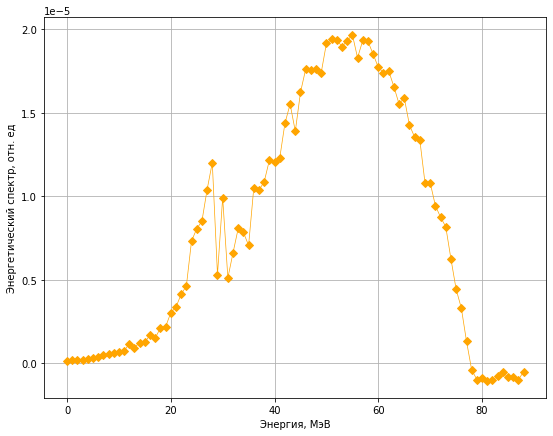

In [23]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(range(89), spectrums_signals[25][25], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1.e-5, 0.3e-4)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

Скрипт

In [24]:
SP, DEV = [], []

for j in range(len(brems_e)):
    sp, dev = deconvolution_one_spectrum(brems_e[j], spectrums_signals[j])
    SP.append(sp)
    DEV.append(dev)
    print(f'ВЫПОЛНЕНО {j+1} из {len(brems_e)}')

(0), время: 0.0 секунд
(1), время: 5.97864 секунд
(2), время: 11.99717 секунд
(3), время: 18.00061 секунд
(4), время: 23.98481 секунд
(5), время: 29.98566 секунд
(6), время: 35.97307 секунд
(7), время: 42.15444 секунд
(8), время: 48.33434 секунд
(9), время: 54.52092 секунд
(10), время: 60.74013 секунд
(11), время: 66.97359 секунд
(12), время: 73.24452 секунд
(13), время: 79.88873 секунд
(14), время: 86.47338 секунд
(15), время: 93.05306 секунд
(16), время: 99.61831 секунд
(17), время: 106.27751 секунд
(18), время: 112.86119 секунд
(19), время: 119.49278 секунд
(20), время: 126.14123 секунд
(21), время: 132.85982 секунд
(22), время: 139.50673 секунд
(23), время: 146.14667 секунд
(24), время: 152.79253 секунд
(25), время: 159.47029 секунд
(26), время: 166.11699 секунд
(27), время: 172.74858 секунд
(28), время: 179.37978 секунд
(29), время: 186.04418 секунд
(30), время: 192.70736 секунд
(31), время: 199.31655 секунд
(32), время: 205.91898 секунд
(33), время: 212.50433 секунд
(34), время: 

(22), время: 157.86839 секунд
(23), время: 165.10464 секунд
(24), время: 172.42275 секунд
(25), время: 179.6881 секунд
(26), время: 186.97205 секунд
(27), время: 194.29319 секунд
(28), время: 201.52848 секунд
(29), время: 208.71745 секунд
(30), время: 215.95756 секунд
(31), время: 223.12296 секунд
(32), время: 230.41801 секунд
(33), время: 237.59071 секунд
(34), время: 244.86758 секунд
(35), время: 252.22325 секунд
(36), время: 259.38147 секунд
(37), время: 266.50529 секунд
(38), время: 273.64583 секунд
(39), время: 280.79928 секунд
(40), время: 287.92101 секунд
(41), время: 295.05987 секунд
(42), время: 302.18055 секунд
(43), время: 309.30121 секунд
(44), время: 316.53921 секунд
(45), время: 323.69146 секунд
(46), время: 330.85848 секунд
(47), время: 338.07811 секунд
(48), время: 345.21498 секунд
(49), время: 352.78165 секунд
(50), время: 359.91709 секунд
ВЫПОЛНЕНО 6 из 50
(0), время: 0.0 секунд
(1), время: 7.24008 секунд
(2), время: 14.34328 секунд
(3), время: 21.44018 секунд
(4), вр

(44), время: 316.88789 секунд
(45), время: 324.05533 секунд
(46), время: 331.18973 секунд
(47), время: 338.35625 секунд
(48), время: 345.49388 секунд
(49), время: 352.87257 секунд
(50), время: 360.0129 секунд
ВЫПОЛНЕНО 11 из 50
(0), время: 0.0 секунд
(1), время: 7.10373 секунд
(2), время: 14.19324 секунд
(3), время: 21.26523 секунд
(4), время: 28.32438 секунд
(5), время: 35.4119 секунд
(6), время: 42.53997 секунд
(7), время: 49.65878 секунд
(8), время: 56.82439 секунд
(9), время: 64.01046 секунд
(10), время: 71.18244 секунд
(11), время: 78.3319 секунд
(12), время: 85.48155 секунд
(13), время: 92.64616 секунд
(14), время: 99.84396 секунд
(15), время: 107.32226 секунд
(16), время: 114.62187 секунд
(17), время: 121.9057 секунд
(18), время: 129.13812 секунд
(19), время: 136.38937 секунд
(20), время: 143.57551 секунд
(21), время: 150.76221 секунд
(22), время: 157.95045 секунд
(23), время: 165.21994 секунд
(24), время: 172.46919 секунд
(25), время: 179.70625 секунд
(26), время: 187.04868 сек

(15), время: 107.49016 секунд
(16), время: 114.68908 секунд
(17), время: 121.88808 секунд
(18), время: 129.15507 секунд
(19), время: 136.33928 секунд
(20), время: 143.53916 секунд
(21), время: 150.85574 секунд
(22), время: 158.04222 секунд
(23), время: 165.25955 секунд
(24), время: 172.5257 секунд
(25), время: 179.79114 секунд
(26), время: 187.30658 секунд
(27), время: 194.62489 секунд
(28), время: 201.94225 секунд
(29), время: 209.19584 секунд
(30), время: 216.4017 секунд
(31), время: 223.57414 секунд
(32), время: 230.72914 секунд
(33), время: 237.86945 секунд
(34), время: 245.08212 секунд
(35), время: 252.2902 секунд
(36), время: 259.43295 секунд
(37), время: 266.61763 секунд
(38), время: 273.76704 секунд
(39), время: 280.87512 секунд
(40), время: 288.00177 секунд
(41), время: 295.12333 секунд
(42), время: 302.22985 секунд
(43), время: 309.61651 секунд
(44), время: 316.80372 секунд
(45), время: 323.98911 секунд
(46), время: 331.12561 секунд
(47), время: 338.2943 секунд
(48), время: 3

(36), время: 264.97876 секунд
(37), время: 272.4527 секунд
(38), время: 279.75697 секунд
(39), время: 287.00185 секунд
(40), время: 294.21318 секунд
(41), время: 301.4199 секунд
(42), время: 308.61033 секунд
(43), время: 315.76737 секунд
(44), время: 322.98689 секунд
(45), время: 330.22697 секунд
(46), время: 337.41266 секунд
(47), время: 344.63229 секунд
(48), время: 351.87823 секунд
(49), время: 359.0546 секунд
(50), время: 366.20687 секунд
ВЫПОЛНЕНО 22 из 50
(0), время: 0.0 секунд
(1), время: 7.13741 секунд
(2), время: 14.36932 секунд
(3), время: 21.65846 секунд
(4), время: 28.84574 секунд
(5), время: 36.00189 секунд
(6), время: 43.14025 секунд
(7), время: 50.37237 секунд
(8), время: 57.68587 секунд
(9), время: 64.77456 секунд
(10), время: 71.89452 секунд
(11), время: 79.17771 секунд
(12), время: 86.70155 секунд
(13), время: 93.97478 секунд
(14), время: 101.32055 секунд
(15), время: 108.53615 секунд
(16), время: 115.7847 секунд
(17), время: 123.01758 секунд
(18), время: 130.26631 се

(6), время: 45.72898 секунд
(7), время: 53.44003 секунд
(8), время: 61.34953 секунд
(9), время: 69.46525 секунд
(10), время: 77.51706 секунд
(11), время: 85.75659 секунд
(12), время: 93.91966 секунд
(13), время: 102.0055 секунд
(14), время: 110.04504 секунд
(15), время: 118.12463 секунд
(16), время: 126.25408 секунд
(17), время: 134.3538 секунд
(18), время: 142.64035 секунд
(19), время: 151.12532 секунд
(20), время: 159.51814 секунд
(21), время: 167.8786 секунд
(22), время: 176.00499 секунд
(23), время: 184.3409 секунд
(24), время: 192.58744 секунд
(25), время: 200.73524 секунд
(26), время: 208.87441 секунд
(27), время: 216.93536 секунд
(28), время: 224.97847 секунд
(29), время: 233.03712 секунд
(30), время: 241.04509 секунд
(31), время: 249.13765 секунд
(32), время: 257.1518 секунд
(33), время: 265.17331 секунд
(34), время: 273.18273 секунд
(35), время: 281.16624 секунд
(36), время: 289.05404 секунд
(37), время: 296.99117 секунд
(38), время: 305.09437 секунд
(39), время: 313.10182 сек

(28), время: 226.51919 секунд
(29), время: 234.56538 секунд
(30), время: 242.51402 секунд
(31), время: 250.50522 секунд
(32), время: 258.51212 секунд
(33), время: 266.57066 секунд
(34), время: 274.90947 секунд
(35), время: 283.35563 секунд
(36), время: 291.69071 секунд
(37), время: 299.82288 секунд
(38), время: 307.99011 секунд
(39), время: 316.14642 секунд
(40), время: 324.36917 секунд
(41), время: 332.67747 секунд
(42), время: 341.00364 секунд
(43), время: 349.18848 секунд
(44), время: 357.38314 секунд
(45), время: 365.53051 секунд
(46), время: 373.80177 секунд
(47), время: 382.30962 секунд
(48), время: 391.35655 секунд
(49), время: 400.33723 секунд
(50), время: 409.45816 секунд
ВЫПОЛНЕНО 33 из 50
(0), время: 0.0 секунд
(1), время: 7.70132 секунд
(2), время: 15.38705 секунд
(3), время: 22.94691 секунд
(4), время: 30.32924 секунд
(5), время: 37.76265 секунд
(6), время: 45.1508 секунд
(7), время: 52.71272 секунд
(8), время: 60.39935 секунд
(9), время: 68.28907 секунд
(10), время: 76.34

(49), время: 414.12118 секунд
(50), время: 423.77794 секунд
ВЫПОЛНЕНО 38 из 50
(0), время: 0.0 секунд
(1), время: 8.22818 секунд
(2), время: 16.18349 секунд
(3), время: 23.97462 секунд
(4), время: 31.58784 секунд
(5), время: 39.25425 секунд
(6), время: 47.09671 секунд
(7), время: 54.80435 секунд
(8), время: 62.60652 секунд
(9), время: 70.70537 секунд
(10), время: 79.04944 секунд
(11), время: 87.57998 секунд
(12), время: 95.89876 секунд
(13), время: 103.91079 секунд
(14), время: 111.7814 секунд
(15), время: 119.58683 секунд
(16), время: 127.80895 секунд
(17), время: 136.12693 секунд
(18), время: 144.53327 секунд
(19), время: 153.00026 секунд
(20), время: 161.48264 секунд
(21), время: 169.95927 секунд
(22), время: 178.49391 секунд
(23), время: 187.03768 секунд
(24), время: 195.46882 секунд
(25), время: 203.85463 секунд
(26), время: 212.41813 секунд
(27), время: 220.9164 секунд
(28), время: 229.45823 секунд
(29), время: 238.06944 секунд
(30), время: 246.93612 секунд
(31), время: 255.7839 

(20), время: 151.4931 секунд
(21), время: 159.05387 секунд
(22), время: 166.70057 секунд
(23), время: 174.56044 секунд
(24), время: 182.41047 секунд
(25), время: 190.33776 секунд
(26), время: 198.31082 секунд
(27), время: 206.36315 секунд
(28), время: 214.71927 секунд
(29), время: 222.96231 секунд
(30), время: 231.21465 секунд
(31), время: 239.54538 секунд
(32), время: 247.8855 секунд
(33), время: 256.31997 секунд
(34), время: 264.82398 секунд
(35), время: 273.56037 секунд
(36), время: 282.39229 секунд
(37), время: 291.35598 секунд
(38), время: 300.39464 секунд
(39), время: 309.51213 секунд
(40), время: 318.71727 секунд
(41), время: 328.01796 секунд
(42), время: 337.65194 секунд
(43), время: 347.1703 секунд
(44), время: 356.75556 секунд
(45), время: 366.3947 секунд
(46), время: 376.08931 секунд
(47), время: 385.87014 секунд
(48), время: 395.79645 секунд
(49), время: 406.13267 секунд
(50), время: 415.90344 секунд
ВЫПОЛНЕНО 44 из 50
(0), время: 0.0 секунд
(1), время: 8.14173 секунд
(2), 

(42), время: 317.90605 секунд
(43), время: 326.5049 секунд
(44), время: 335.16611 секунд
(45), время: 343.90426 секунд
(46), время: 352.88377 секунд
(47), время: 361.79779 секунд
(48), время: 370.75365 секунд
(49), время: 379.67987 секунд
(50), время: 388.19356 секунд
ВЫПОЛНЕНО 49 из 50
(0), время: 0.0 секунд
(1), время: 7.92297 секунд
(2), время: 15.75153 секунд
(3), время: 23.82989 секунд
(4), время: 31.68753 секунд
(5), время: 39.31465 секунд
(6), время: 46.79011 секунд
(7), время: 54.15408 секунд
(8), время: 61.4291 секунд
(9), время: 68.63293 секунд
(10), время: 75.81622 секунд
(11), время: 82.78274 секунд
(12), время: 89.25877 секунд
(13), время: 95.79999 секунд
(14), время: 102.27302 секунд
(15), время: 108.75322 секунд
(16), время: 115.20151 секунд
(17), время: 121.66759 секунд
(18), время: 128.08267 секунд
(19), время: 134.51436 секунд
(20), время: 140.96332 секунд
(21), время: 147.48067 секунд
(22), время: 153.93008 секунд
(23), время: 160.45969 секунд
(24), время: 166.97474 

Сохранение данных

In [25]:
np.save(f'R_{m}_SP.npy', SP)
np.save(f'R_{m}_DEV.npy', DEV)

Загрузка данных

Построение

In [26]:
from mpl_toolkits.mplot3d import Axes3D

In [27]:
len(DEV[0])

51

In [29]:
D = np.array(DEV)
X,Y = np.meshgrid(levels, beams_energyes)
X, Ylog = np.meshgrid(levels, np.log10(beams_energyes))
Xlog, Ylog = np.meshgrid(np.log10(levels), np.log10(beams_energyes))

Контурная карта

In [30]:
linspace4 = np.geomspace(5e-3, 0.3, 15)
linspace5 = np.linspace(0.31, 2, 15)

In [31]:
c_map_levels = []
c_map_levels.extend(linspace4)
c_map_levels.extend(linspace5)

Text(0, 0.5, 'Энергия электронов, МэВ')

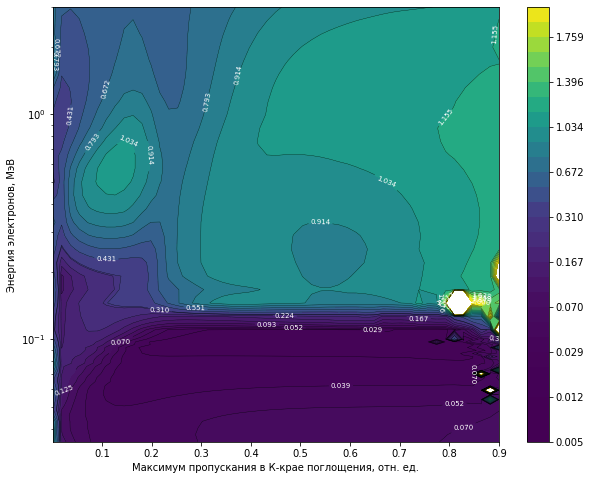

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))

c_map = ax.contourf(X, Y, D, levels=c_map_levels)
borders = ax.contour(X, Y, D, colors='k', levels=c_map_levels, linewidths=0.3)
ax.clabel(borders, fontsize=7, colors='w')
fig.colorbar(c_map)
# ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Максимум пропускания в К-крае поглощения, отн. ед.')
ax.set_ylabel('Энергия электронов, МэВ')

# fig.savefig('Фильтры_Росса_контурная_карта.jpg', bbox_inches='tight')

Зависимость минимальной ошибки восстановления от граничной энерии спектра

In [33]:
minimal_deviations = []

for i,val in enumerate(beams_energyes):
    min_value = min(DEV[i])
    minimal_deviations.append(min_value)

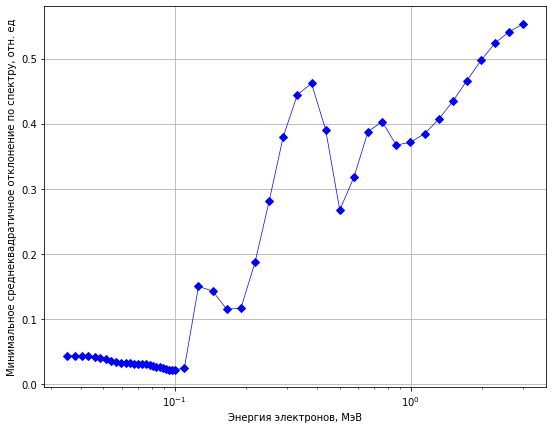

In [34]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(beams_energyes, minimal_deviations, ls='-', marker='D', lw='0.7', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия электронов, МэВ', fontsize=10)
ax.set_ylabel('Минимальное среднеквадратичное отклонение по спектру, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.grid(True)

# fig.savefig('Фильтры_Росса_минимум_ошибки_восстановления_от_энергии_электронов.jpg', bbox_inches='tight')

In [36]:
np.save(f'R_{m}_MIN.npy', minimal_deviations)